In [10]:
!pip3 install spacy

In [11]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
# english_words = set(words.words())
from nltk.tokenize import word_tokenize
tokenizer=nltk.RegexpTokenizer(r"\w+")
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import words
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
df=pd.read_csv("/content/train.csv",encoding="utf-8",engine="python")

In [13]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
lemmatizer=WordNetLemmatizer()

In [15]:
lemmatizer.lemmatize('feet')

'foot'

In [16]:
lemmatizer = WordNetLemmatizer()
english_words = set(words.words())

def message_to_token(s):
    tokens = word_tokenize(s)
    lowercase_tokens = [t.lower() for t in tokens]
    lemmatize_tokens = [lemmatizer.lemmatize(t) for t in lowercase_tokens]
    useful_tokens = [t for t in lemmatize_tokens if t in english_words]
    return useful_tokens


In [17]:
tokenizer=tokenizer.tokenize('@user when a father is great')

In [9]:
tokenizer

['user', 'when', 'a', 'father', 'is', 'great']

In [18]:
words=dict()
def add_to_dict(d,filename):
  with open(filename,'r') as f:
    for line in f.readlines():
      line=line.split('')



In [19]:
add_to_dict(words,'/content/positive-word.txt')
add_to_dict(words,'/content/negative-word.txt')

In [20]:
!pip install -U spacy
!python -m spacy download en_core_web_md

/usr/local/lib/python3.12/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 17.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy

nlp = spacy.load("en_core_web_md")
print("Model loaded!")

Model loaded!


In [22]:
def message_to_word(message):
    doc = nlp(message)
    vectors = []
    for token in doc:
        if token.has_vector:
            vectors.append(token.vector)
    if len(vectors) == 0:
        # No tokens with vectors, return a zero vector sequence with shape (1, 300)
        return np.zeros((1, nlp.vocab.vectors_length))
    return np.array(vectors, dtype=np.float32)

message_to_word("@user when a father is great").shape

(6, 300)

In [23]:
train_df=df.sample(frac=1,random_state=1)
train_df.reset_index(drop=True,inplace=True)
split_index_1=int(len(train_df)*0.8)
split_index_2=int(len(train_df)*0.9)
train_df,val_df,test_df=train_df[:split_index_1],train_df[split_index_1:split_index_2],train_df[split_index_2:]
len(train_df),len(val_df),len(test_df)


(25569, 3196, 3197)

In [24]:
from copy import deepcopy
def pad_x(x, desired_sequence_length=100, embedding_dim=50):
    padded_sequences = []

    for i, sequence in enumerate(x):
        if sequence.shape[1] != embedding_dim:
            raise ValueError(f"Embedding dimension mismatch at index {i}: got {sequence.shape[1]}, expected {embedding_dim}")

        seq_len = sequence.shape[0]

        if seq_len < desired_sequence_length:
            padding = np.zeros((desired_sequence_length - seq_len, embedding_dim))
            sequence = np.concatenate([sequence, padding], axis=0)
        elif seq_len > desired_sequence_length:
            sequence = sequence[:desired_sequence_length]

        padded_sequences.append(sequence)

    return np.stack(padded_sequences)

In [31]:
# x_val,y_val=df_to_x_y(val_df)

In [32]:
# x_train=pad_x(x_train)

In [25]:
def df_to_x_y(dff):
    y = dff['label'].to_numpy().astype(int)
    all_word_vector_sequences = []

    for message in dff['tweet']:
        message_as_vector_seq = message_to_word(message)

        if message_as_vector_seq.shape[0] == 0:
            message_as_vector_seq = np.zeros(shape=(1, 50))

        all_word_vector_sequences.append(message_as_vector_seq)

    return all_word_vector_sequences, y


In [26]:
x_train,y_train=df_to_x_y(train_df)
print(len(x_train),len(y_train))

25569 25569


In [27]:
sequence_lengths=[]
for i in range(len(x_train)):
  sequence_lengths.append(len(x_train[i]))


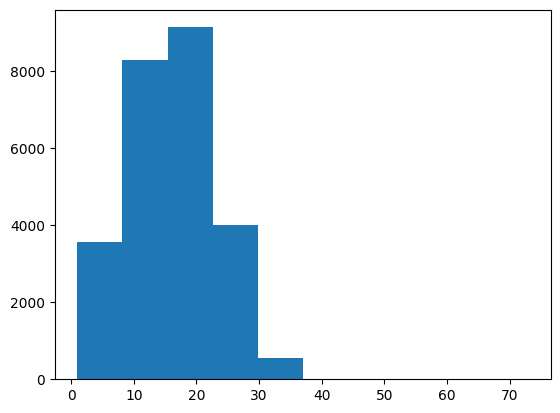

In [28]:
plt.hist(sequence_lengths)
plt.show()

In [29]:
pd.Series(sequence_lengths).describe()

,0
count,25569.000000
mean,16.106261
std,6.663975
min,1.000000
25%,11.000000
50%,16.000000
75%,21.000000
max,73.000000


In [30]:
x_val,y_val=df_to_x_y(val_df)
x_val = pad_x(x_val, desired_sequence_length=100, embedding_dim=50)
x_val.shape,y_val.shape

ValueError: Embedding dimension mismatch at index 0: got 300, expected 50

In [130]:
from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model=Sequential([])
model.add(layers.Input(shape=(57,40)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 57, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 57, 64)         │        26,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,993 (363.25 KB)

 Trainable params: 92,993 (363.25 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# x_train = pad_x(x_train)
# x_val = pad_x(x_val)
# print(x_train.shape, y_train.shape)

In [134]:
cp=ModelCheckpoint('/content/output.keras',save_best_only=True)
# save_weights_only=True
model.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=[BinaryAccuracy()])

In [135]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(),metrics=[BinaryAccuracy()])

In [136]:
frequencies=pd.value_counts(df['label'])
frequencies

/tmp/ipython-input-3949307869.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencies=pd.value_counts(df['label'])


,count
label,
0,29720
1,2242


In [137]:
weights={0:frequencies.sum()/frequencies[0],1:frequencies.sum()/frequencies[1]}
weights = {k: float(v) for k, v in weights.items()}
weights

{0: 1.0754374158815612, 1: 14.256021409455842}

In [2]:
embedding_dim = 300
x_train_filtered = [seq for seq in x_train if seq.shape[1] == embedding_dim]
y_train_filtered = y_train[:len(x_train_filtered)]  # careful: make sure labels align

x_train = pad_x(x_train_filtered, desired_sequence_length=100, embedding_dim=embedding_dim)
x_val = pad_x(x_val, desired_sequence_length=100, embedding_dim=embedding_dim)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, class_weight=weights)

NameError: name 'x_train' is not defined

In [8]:
embedding_dim = 300
x_train, y_train = df_to_x_y(train_df)
x_train_filtered = [seq for seq in x_train if seq.shape[1] == embedding_dim]
y_train_filtered = y_train[:len(x_train_filtered)]  # careful: make sure labels align

x_train = pad_x(x_train_filtered, desired_sequence_length=100, embedding_dim=embedding_dim)


NameError: name 'df_to_x_y' is not defined

In [139]:
# x_train, y_train = df_to_x_y(train_df)
# x_val, y_val = df_to_x_y(val_df)

# embedding_dim = x_train[0].shape[1]  # get actual embedding dim

# x_train = pad_x(x_train, desired_sequence_length=100, embedding_dim=embedding_dim)
# x_val = pad_x(x_val, desired_sequence_length=100, embedding_dim=embedding_dim)

# print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)

# model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, class_weight=weights)

ValueError: Embedding dimension mismatch at index 15581: got 50, expected 300

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/model/')

In [ ]:
test_predictions=(best_model.predict(x_test)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predictions))

In [ ]:
# https://www.youtube.com/watch?v=e0WW5w13V64